# Performing Linear Regression on the Boston Housing Dataset using scikit-learn

## Getting Started

First, we're going to import a few libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import mean
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Next, we load the dataset into a variable 'boston_dataset'.

In [3]:
boston_dataset = load_boston()

We then build a Pandas dataframe using the dataset, setting the feature names as the columns. Finally, to make sure the dataframe is loaded, we print its shape (this also gives us some idea about its dimensions). 

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

print(boston.shape)

(506, 14)


As we can see, the dataframe has 506 rows and 14 columns.
There is actually a description available for each of the 14 columns which we can access.

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We can reference this later when we perform our exploratory data analysis and selecting which features to feed our model.

Here are the summary statistics of our dataset.

In [6]:
print(boston.describe().round(2))

         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean     3.61   11.36   11.14    0.07    0.55    6.28   68.57    3.80    9.55   
std      8.60   23.32    6.86    0.25    0.12    0.70   28.15    2.11    8.71   
min      0.01    0.00    0.46    0.00    0.38    3.56    2.90    1.13    1.00   
25%      0.08    0.00    5.19    0.00    0.45    5.89   45.02    2.10    4.00   
50%      0.26    0.00    9.69    0.00    0.54    6.21   77.50    3.21    5.00   
75%      3.68   12.50   18.10    0.00    0.62    6.62   94.07    5.19   24.00   
max     88.98  100.00   27.74    1.00    0.87    8.78  100.00   12.13   24.00   

          TAX  PTRATIO       B   LSTAT    MEDV  
count  506.00   506.00  506.00  506.00  506.00  
mean   408.24    18.46  356.67   12.65   22.53  
std    168.54     2.16   91.29    7.14    9.20  
min    187.00    12.60    0.32    1.73    5.00  
25%    279.00    17.40  3

There are no missing values in any of the features, so that is promising.

## Exploratory Data Analysis

Time to get familiar with our data.

### Histograms

#### CRIM

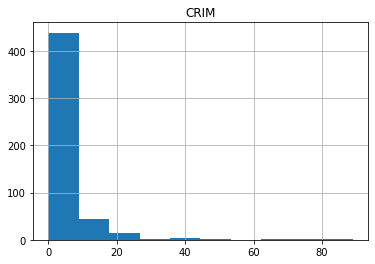

In [7]:
boston.hist(column = 'CRIM')
plt.savefig("CRIM hist.png")
plt.show()

CRIM appears to be right (positively) skewed, with most values between 0 and 9%. Summary stats show that the median is much lesser than the mean, affirming the above.

#### ZN

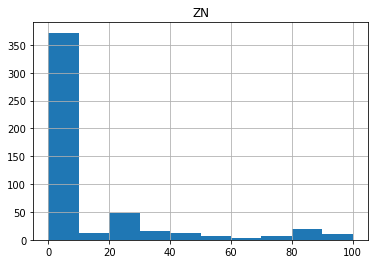

In [8]:
boston.hist(column = 'ZN')
plt.savefig("ZN hist.png")
plt.show()

Summary stats show that ZN's mean is much higher than its median. Right (positive) skewness confirmed by graph, so proportion of land zoned is less.

#### INDUS

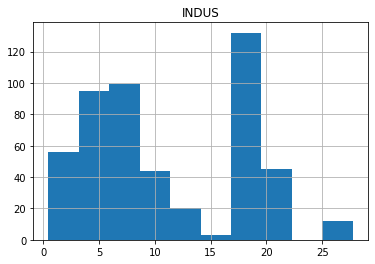

In [8]:
boston.hist(column = 'INDUS')
plt.savefig("INDUS hist.png")
plt.show()

INDUS' mean is slightly greater than its median. Slight right (positive) skew confirmed by graph, following a bimodal distribution

#### CHAS

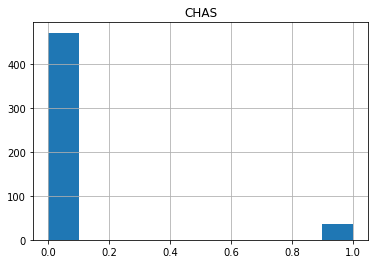

In [10]:
boston.hist(column = 'CHAS')
plt.savefig("CHAS hist.png")
plt.show()

CHAS is mostly 0's (over 450 out of 506 values) so very few houses near the river.

#### NOX

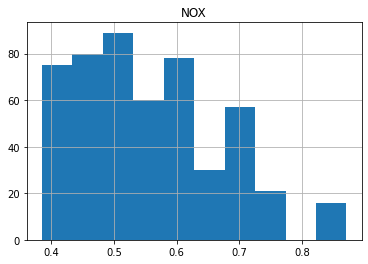

In [11]:
boston.hist(column = 'NOX')
plt.savefig("NOX hist.png")
plt.show()

NOX has similar mean and median. Histogram shows a rough normal dist.

#### RM

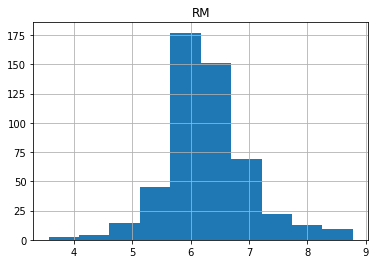

In [12]:
boston.hist(column = 'RM')
plt.savefig("RM hist.png")
plt.show()

RM appears to be normally distributed, the summary stats show median and mean are similar. The histogram plot affirms the same, so the average number of rooms is normally distributed.

#### AGE

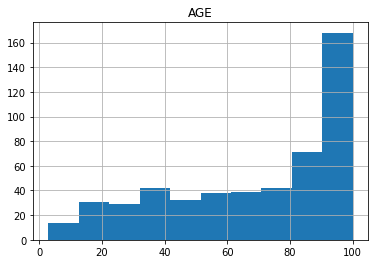

In [13]:
boston.hist(column = 'AGE')
plt.savefig("AGE hist.png")
plt.show()

AGE appears to have a slightly greater median than mean. Histogram shows left (negative) skew, so most of the houses are made before 1940.

#### DIS

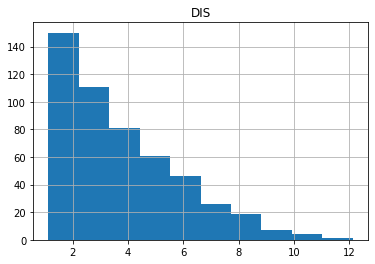

In [14]:
boston.hist(column = 'DIS')
plt.savefig('DIS hist.png')
plt.show()

DIS has a slightly greater mean than median. Histogram shows right skew.

#### RAD

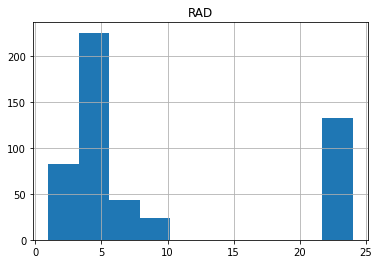

In [16]:
boston.hist(column = 'RAD')
plt.savefig("RAD hist.png")
plt.show()

RAD has a greater mean than median and 75% (3rd quartile) is much greater than either. Histogram shows right skew, following a bimodal distribution.

#### PTRATIO

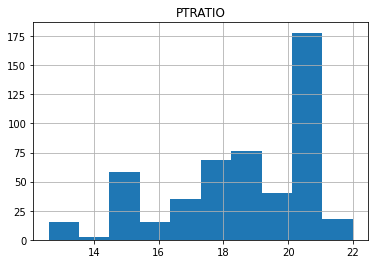

In [17]:
boston.hist(column = 'PTRATIO')
plt.savefig("PTRATIO hist.png")
plt.show()

Mean is slightly smaller than median. Left skew.

#### B

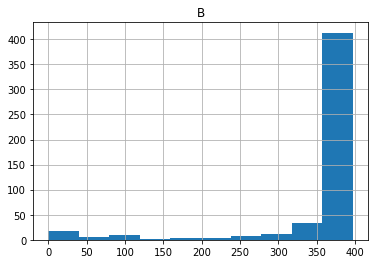

In [18]:
boston.hist(column = "B")
plt.savefig("B hist.png")
plt.show()

Median is greater than mean. Left skew.

#### LSTAT

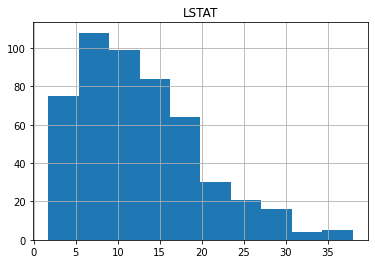

In [19]:
boston.hist(column = "LSTAT")
plt.savefig("LSTAT hist.png")
plt.show()

Mean is slightly greater than median. Right skew.

Graphing the data and comparing the mean, medians and quartiles from the summary statistics have allowed us to understand the trends of each individual feature better.

### Correlations

In [9]:
corr_matrix = boston.corr().round(2)
print(corr_matrix)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

From the matrix, we see that the most correlated features with our target feature are RM (positive) and LSTAT (-ve).

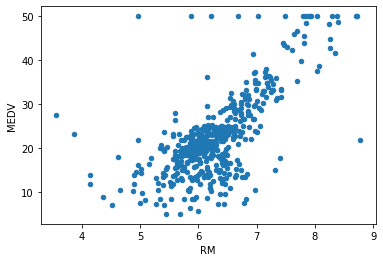

In [10]:
boston.plot(kind = "scatter", x = 'RM', y = 'MEDV')
plt.savefig("RM scatter.png")
plt.show()

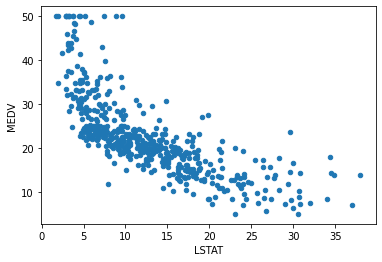

In [22]:
boston.plot(kind = "scatter", x = 'LSTAT', y = 'MEDV')
plt.savefig("LSTAT scatter.png")
plt.show()

## Feature Selection

With the information we have from the Exploratory Data Analysis section, we will proceed by selecting RM and LSTAT as the features for our model.

In [11]:
X = boston[['RM', 'LSTAT']]
y = boston['MEDV']

## Model Training

We create an instance of our model from the sklearn LinearRegression class.

In [12]:
model = LinearRegression()

This code divides the X and y data into two portions: training data and testing data. The test_size parameter sets the proportions of the testing and training data (test_size = 0.3 sets them to 30% and 70% respectively). Giving the random_state a non-zero integer value ensures that the results are reproducible.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

We train our model with the training data (X_train and y_train), then print out the Y-intercept and feature coefficients, which are measurements associated with linear regression.

In [14]:
model.fit(X_train, y_train)
print("Y intercept is: ", model.intercept_.round(2))
print("Feature coefficients are: ", model.coef_.round(2))

Y intercept is:  5.32
Feature coefficients are:  [ 4.13 -0.68]


## Model Testing

We now use the trained model to predict values from the test data.

In [15]:
y_test_predicted = model.predict(X_test)

Now we compare our predictions to y_test: the actual values associated with X_test from the dataset. We use Root Mean Squared Error (RMSE) to find the average difference between the predicted values and the actual values.

In [19]:
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predicted))).round(2)
print("Root mean squared error is: ", rmse)

Root mean squared error is:  5.38


This is a pretty low value for RMSE (considering the scale we are working with), which means that our model is fairly accurate. This is supported when we compare our RMSE of 5.38 to MEDV's standard deviation of 9.20.